In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [3]:
data = pd.read_csv('C:/Users/Cicil/Desktop/social Media post/college_student_marks.csv')

In [4]:
data.head()

,Unnamed: 0,reg_no.,Semester 1,Semester 2,Semester 3,semester 4,Semster 5,Semester 6,Semster 7,Semester 8,Overall cgpa,Rank,Remark
0,0,2.010000e+11,5.13,5.13,5.13,5.13,5.13,5.13,5.13,5.13,5.13000,168,Arrear
1,1,2.010000e+11,5.90,5.80,5.10,6.16,7.90,7.18,7.99,5.10,6.39125,115,Pass
2,2,2.010000e+11,8.36,8.90,5.30,5.00,8.36,8.90,8.36,5.30,7.31000,55,Pass
3,3,2.010000e+11,8.27,8.86,8.27,5.71,8.27,4.87,8.27,8.27,7.59875,40,Pass
4,4,2.010000e+11,5.45,5.20,5.80,8.31,5.45,5.20,5.45,5.80,5.83250,142,Arrear


In [5]:
data.shape

(170, 13)

In [6]:
data.describe(include='all')

,Unnamed: 0,reg_no.,Semester 1,Semester 2,Semester 3,semester 4,Semster 5,Semester 6,Semster 7,Semester 8,Overall cgpa,Rank,Remark
count,170.000000,1.700000e+02,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135
mean,84.500000,2.454706e+11,6.978941,7.058824,6.374588,6.992588,6.985353,7.047412,6.991235,6.451412,6.860044,45.723529,NaN
std,49.218899,2.109746e+10,1.616802,1.628284,1.427633,1.637031,1.622372,1.632927,1.616496,1.423840,0.904420,38.061769,NaN
min,0.000000,2.010000e+11,4.600000,4.670000,3.300000,4.670000,4.600000,4.670000,4.600000,3.500000,4.773750,1.000000,NaN
25%,42.250000,2.350000e+11,5.432500,5.447500,5.100000,5.320000,5.362500,5.365000,5.432500,5.135000,6.112188,15.000000,NaN
50%,84.500000,2.370000e+11,7.040000,7.865000,6.100000,7.620000,7.620000,7.865000,7.620000,6.125000,6.806875,34.500000,NaN
75%,126.750000,2.700000e+11,8.575000,8.677500,7.500000,8.640000,8.575000,8.665000,8.575000,7.600000,7.522812,68.000000,NaN


In [8]:
data.isnull().sum()

Unnamed: 0      0
reg_no.         0
Semester 1      0
Semester 2      0
Semester 3      0
semester 4      0
Semster 5       0
Semester 6      0
Semster 7       0
Semester 8      0
Overall cgpa    0
Rank            0
Remark          0
dtype: int64

In [10]:
data.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
reg_no.,201000000000.0,201000000000.0,201000000000.0,201000000000.0,201000000000.0
Semester 1,5.13,5.9,8.36,8.27,5.45
Semester 2,5.13,5.8,8.9,8.86,5.2
Semester 3,5.13,5.1,5.3,8.27,5.8
semester 4,5.13,6.16,5.0,5.71,8.31
Semster 5,5.13,7.9,8.36,8.27,5.45
Semester 6,5.13,7.18,8.9,4.87,5.2
Semster 7,5.13,7.99,8.36,8.27,5.45
Semester 8,5.13,5.1,5.3,8.27,5.8


In [28]:
data = data.copy()

In [31]:
data.drop(['Rank'], axis=1, inplace=True)

In [32]:
m_cols = [col for col in data.columns if data[col].dtype in ['int64','float64']]
cat_cols = [col for col in data.columns if data[col].dtype == 'object']

In [14]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Unnamed: 0      0
reg_no.         0
Semester 1      0
Semester 2      0
Semester 3      0
semester 4      0
Semster 5       0
Semester 6      0
Semster 7       0
Semester 8      0
Overall cgpa    0
Rank            0
Remark          0
dtype: int64


In [33]:
print(data.duplicated().sum())

0


In [34]:
X = data.add

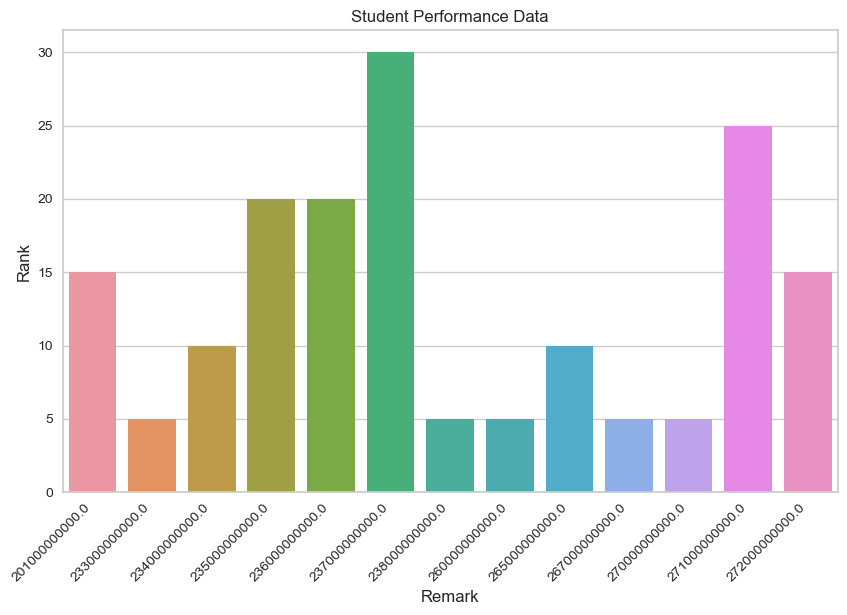

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='reg_no.', data=df)
plt.xlabel('Remark')
plt.ylabel('Rank')
plt.title('Student Performance Data')
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: >

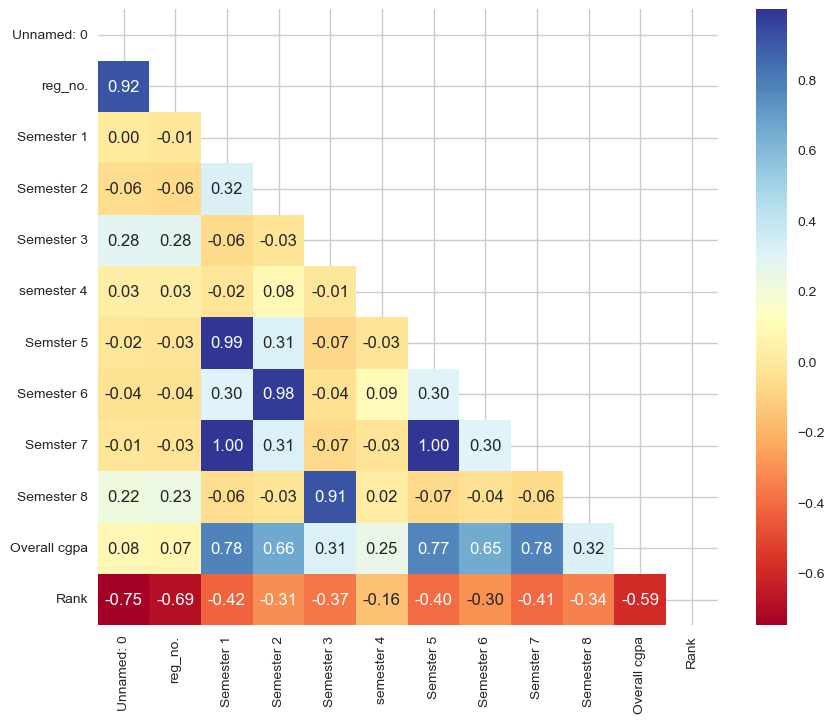

In [43]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,8))
sns.heatmap(corr, mask=mask, cmap="RdYlBu", annot=True, fmt=".02f")